In [115]:
%load_ext autoreload
%autoreload 2
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit,KFold, GridSearchCV
from sklearn.metrics import accuracy_score,fbeta_score,f1_score
import numpy as np
import matplotlib.pyplot as plt
from helpers import make_complexity_curve, make_learning_curve

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


**Load Cleaned Adult Data**

In [5]:
adult_df = pd.read_csv(filepath_or_buffer="adult_cleaned.csv")
adult_df_dummies = pd.get_dummies(adult_df.drop('target', 1))
adult_x = adult_df_dummies.copy().values
adult_y = adult_df["target"].copy().values
X_adult_train, X_adult_test, y_adult_train, y_adult_test = train_test_split(adult_x, adult_y, test_size=0.3,random_state=0)

**Load Cleaned Titanic Data**

In [70]:
titanic_train = pd.read_csv(filepath_or_buffer="titanic_train_cleaned.csv")
titanic_test = pd.read_csv(filepath_or_buffer="titanic_test_cleaned.csv")
titanic_df_dummies = pd.get_dummies(titanic_train.drop("Survived", 1))
X_titanic_train = titanic_df_dummies.copy().values
y_titanic_train = titanic_train["Survived"]

(891, 11)
(418, 10)


**Load Spam**

In [128]:
spam_df = pd.read_csv('spambase2.csv', header=0)
spam_x = spam_df.drop('class', axis=1)
spam_y = spam_df['class']
X_spam_train, X_spam_test, y_spam_train, y_spam_test = train_test_split(spam_x, spam_y, test_size=0.3,random_state=0)
print(f"X_spam_train: {X_spam_train.shape}")
print(f"X_spam_test: {X_spam_test.shape}")
print(f"y_spam_train: {y_spam_train.shape}")
print(f"y_spam_test: {y_spam_test.shape}")

X_spam_train: (3220, 57)
X_spam_test: (1381, 57)
y_spam_train: (3220,)
y_spam_test: (1381,)


**GridSearch**

In [35]:
params = {
    'criterion':['gini','entropy'],
    'max_depth': list(np.arange(1, 50, 1)),
    'class_weight': ['balanced', None]
}

In [41]:
adult_cv = GridSearchCV(DecisionTreeClassifier(),param_grid=params, cv=5)
adult_cv.fit(X_adult_train, y_adult_train)
print(f"best params adult: {adult_cv.best_params_}")

best params adult: {'class_weight': None, 'criterion': 'gini', 'max_depth': 9}


In [42]:
titanic_cv = GridSearchCV(DecisionTreeClassifier(),param_grid=params, cv=5)
titanic_cv.fit(X_titanic_train, y_titanic_train)
titanic_cv.best_params_
print(f"best params titanic: {titanic_cv.best_params_}")

best params titanic: {'class_weight': None, 'criterion': 'entropy', 'max_depth': 3}


In [129]:
spam_cv = GridSearchCV(DecisionTreeClassifier(),param_grid=params, cv=5)
spam_cv.fit(X_spam_train, y_spam_train)
spam_cv.best_params_
print(f"best params spam: {spam_cv.best_params_}")

best params spam: {'class_weight': None, 'criterion': 'entropy', 'max_depth': 13}


In [135]:
print(spam_cv.best_estimator_.score(X_spam_test, y_spam_test))
print(adult_cv.best_estimator_.score(X_adult_test, y_adult_test))

0.9152787834902245
0.849486131064206


**Feature importances**

In [130]:
adult_feature_importances = sorted(list(zip(adult_df_dummies.columns.values, adult_cv.best_estimator_.feature_importances_)), key=lambda tup: tup[1], reverse=True)
for adult_fi in adult_feature_importances[:20]:
    print(adult_fi)

('marital-status_Married-civ-spouse', 0.3947774701947448)
('education-num', 0.21026347340513765)
('capital-gain', 0.18970924666199074)
('capital-loss', 0.05640469715383209)
('age', 0.05374725495096275)
('hours-per-week', 0.030254103823453084)
('occupation_Exec-managerial', 0.01050742836361517)
('occupation_Prof-specialty', 0.007893451602008633)
('relationship_Wife', 0.005106263913189988)
('education_Masters', 0.0048894772386676)
('occupation_Farming-fishing', 0.004059417659906671)
('fnlwgt', 0.0040028023666846685)
('workclass_Self-emp-not-inc', 0.0033368003820074266)
('workclass_Private', 0.002526522762648248)
('occupation_Tech-support', 0.0022719617122124616)
('workclass_Federal-gov', 0.001823345707095176)
('education_Bachelors', 0.0017015625701452609)
('marital-status_Never-married', 0.0015381995831640954)
('workclass_Local-gov', 0.0014487376748235675)
('relationship_Not-in-family', 0.000940878011112084)


In [61]:
titanic_feature_importances = sorted(list(zip(titanic_df_dummies.columns.values, titanic_cv.best_estimator_.feature_importances_)), key=lambda tup: tup[1], reverse=True)
for titanic_fi in titanic_feature_importances[:10]:
    print(titanic_fi)

('Title_Mr', 0.5687696664509453)
('Pclass', 0.14806252455289678)
('Title_Rare', 0.09400321852731179)
('Fare', 0.08942872106666509)
('FamilySize', 0.08713672916046142)
('Age', 0.012599140241719603)
('Sex', 0.0)
('Parch', 0.0)
('Has_Cabin', 0.0)
('IsAlone', 0.0)


In [123]:
spam_feature_importances = sorted(list(zip(spam_df.columns.values, spam_cv.best_estimator_.feature_importances_)), key=lambda tup: tup[1], reverse=True)
for spam_fi in spam_feature_importances[:20]:
    print(spam_fi)

('char_freq_%21', 0.30129246393635234)
('word_freq_remove', 0.13694539621330817)
('char_freq_%24', 0.12189661258861083)
('capital_run_length_average', 0.05878173823481364)
('word_freq_hp', 0.04283376442958575)
('capital_run_length_longest', 0.03431118198732005)
('word_freq_free', 0.030929776916363623)
('word_freq_george', 0.03079610797501758)
('word_freq_our', 0.030561640524346765)
('word_freq_edu', 0.02912240836103947)
('word_freq_you', 0.020203266214200027)
('capital_run_length_total', 0.019084629210578023)
('word_freq_re', 0.017962423325631624)
('word_freq_your', 0.016934687733822708)
('word_freq_internet', 0.009547321788141525)
('word_freq_will', 0.009380327936300873)
('word_freq_email', 0.008964314455108651)
('word_freq_000', 0.008564849898095046)
('word_freq_business', 0.007693892005835637)
('word_freq_all', 0.007414326128489579)


**Learning curve**

best size: 19001


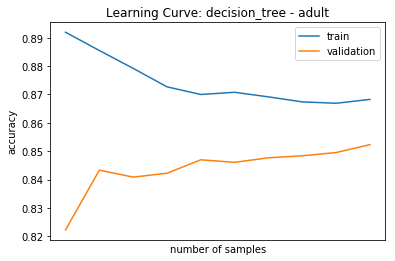

In [62]:
make_learning_curve(adult_cv.best_estimator_,X_adult_train,y_adult_train,np.linspace(0.1, 1.0, 10),10,"decision_tree","adult")

best size: 801


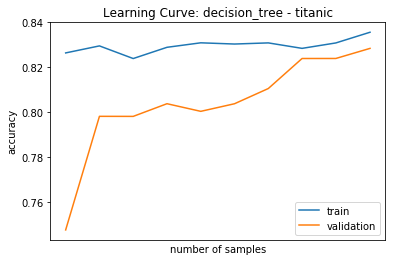

In [63]:
make_learning_curve(titanic_cv.best_estimator_, X_titanic_train, y_titanic_train, np.linspace(0.1, 1.0, 10), 10, "decision_tree", "titanic")

best size: 2897


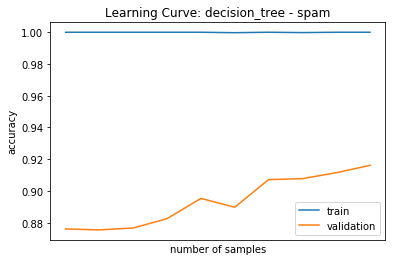

In [124]:
make_learning_curve(spam_cv.best_estimator_,X_spam_train,y_spam_train,np.linspace(0.1, 1.0, 10),10,"decision_tree","spam")

**Max Depths**

Model Complexity Curve: decision_tree - adult (max_depth)
best max_depth: 8
Complexity curve complete


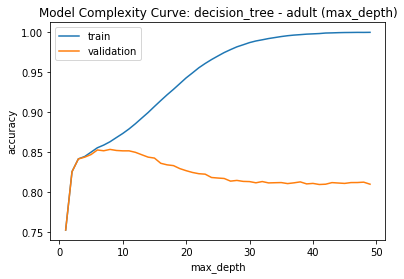

In [7]:
max_depths = list(np.arange(1, 50, 1))
make_complexity_curve(DecisionTreeClassifier(), X_adult_train, y_adult_train,"max_depth",max_depths,10,"decision_tree","adult")

Model Complexity Curve: decision_tree - titanic (max_depth)
best max_depth: 7
Complexity curve complete


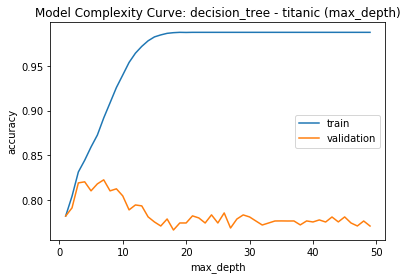

In [66]:
max_depths = list(np.arange(1, 50, 1))
make_complexity_curve(DecisionTreeClassifier(), X_titanic_train, y_titanic_train,"max_depth",max_depths,10,"decision_tree","titanic")

Model Complexity Curve: decision_tree - spam (max_depth)
best max_depth: 7


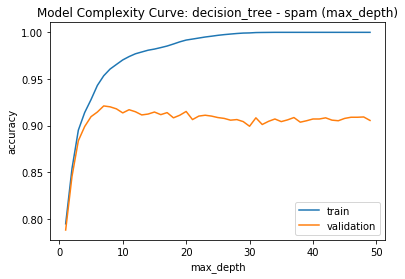

Complexity curve complete


In [121]:
max_depths = list(np.arange(1, 50, 1))
make_complexity_curve(DecisionTreeClassifier(), X_spam_train, y_spam_train,"max_depth",max_depths,10,"decision_tree","spam")

**Min_samples_splits**

Model Complexity Curve: decision_tree - adult (min_samples_split)
best min_samples_split: 149
Complexity curve complete


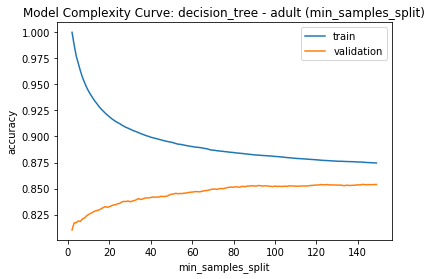

In [11]:
min_samples_splits = list(np.arange(2, 150, 1))
make_complexity_curve(DecisionTreeClassifier(), X_adult_train, y_adult_train,"min_samples_split",min_samples_splits,10,"decision_tree","adult")

Model Complexity Curve: titanic - titanic (min_samples_split)
best min_samples_split: 86
Complexity curve complete


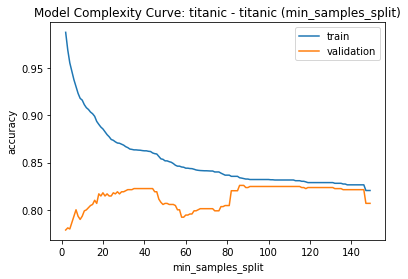

In [12]:
min_samples_splits = list(np.arange(2, 150, 1))
make_complexity_curve(DecisionTreeClassifier(), X_titanic_train, y_titanic_train,"min_samples_split",min_samples_splits,10,"titanic","titanic")

**Min_samples_leafs**

Model Complexity Curve: decision_tree - adult (min_samples_leaf)
best min_samples_leaf: 46
Complexity curve complete


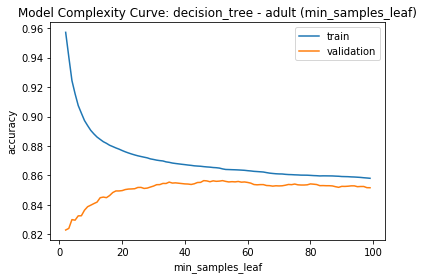

In [13]:
min_samples_leafs = list(np.arange(2, 100, 1))
make_complexity_curve(DecisionTreeClassifier(), X_adult_train, y_adult_train,"min_samples_leaf",min_samples_leafs,10,"decision_tree","adult")

Model Complexity Curve: decision_tree - titanic (min_samples_leaf)
best min_samples_leaf: 11
Complexity curve complete


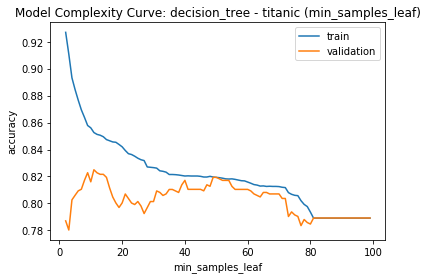

In [14]:
min_samples_leafs = list(np.arange(2, 100, 1))
make_complexity_curve(DecisionTreeClassifier(), X_titanic_train, y_titanic_train,"min_samples_leaf",min_samples_leafs,10,"decision_tree","titanic")

**Max_features**

Model Complexity Curve: Decision Tree - adult (max_features)
best max_features: 78
Complexity curve complete


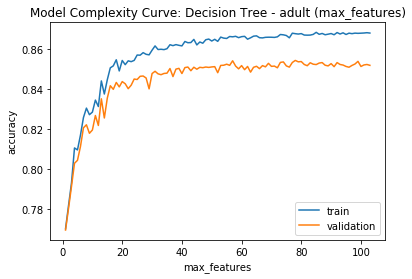

In [72]:
max_features_adult = list(range(1,X_adult_train.shape[1]))
make_complexity_curve(adult_cv.best_estimator_, X_adult_train, y_adult_train,"max_features",max_features_adult,10,"Decision Tree","adult")

Model Complexity Curve: Decision Tree - titanic (max_features)
best max_features: 12


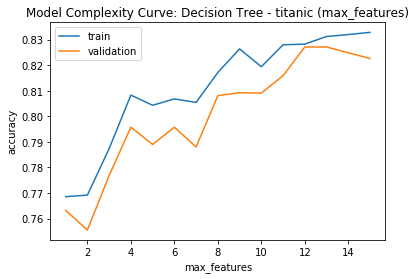

Complexity curve complete


In [119]:
max_features_titanic = list(range(1,X_titanic_train.shape[1]))
make_complexity_curve(titanic_cv.best_estimator_, X_titanic_train, y_titanic_train,"max_features",max_features_titanic,10,"Decision Tree","titanic")

Model Complexity Curve: Decision Tree - spam (max_features)
best max_features: 38


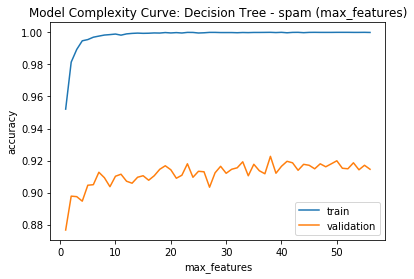

Complexity curve complete


In [125]:
max_features_spam = list(range(1,X_spam_train.shape[1]))
make_complexity_curve(spam_cv.best_estimator_, X_spam_train, y_spam_train,"max_features",max_features_spam,10,"Decision Tree","spam")